In [51]:
import pandas as pd

In [23]:
df= pd.read_csv('all_data.csv')
df.tail(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186800,259311,Flatscreen TV,1,300,09/18/19 14:54,"930 North St, Seattle, WA 98101"
186801,259312,Wired Headphones,1,11.99,09/02/19 19:51,"573 Sunset St, San Francisco, CA 94016"
186802,259313,Bose SoundSport Headphones,1,99.99,09/05/19 11:34,"138 2nd St, Los Angeles, CA 90001"
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186805,259315,Lightning Charging Cable,1,14.95,09/29/19 16:20,"112 5th St, Boston, MA 02215"
186806,259316,AAA Batteries (4-pack),1,2.99,09/16/19 16:48,"369 Johnson St, Atlanta, GA 30301"
186807,259317,Lightning Charging Cable,1,14.95,09/26/19 21:12,"151 1st St, New York City, NY 10001"
186808,259318,AAA Batteries (4-pack),1,2.99,09/30/19 10:05,"524 Hickory St, Boston, MA 02215"
186809,259319,27in 4K Gaming Monitor,1,389.99,09/15/19 12:30,"811 Lincoln St, San Francisco, CA 94016"


### clean up the data

###### find nan 

In [24]:
nan_df= df[df.isna().any(axis=1)]

df= df.dropna(how='any')

##### find 'or' and delete

In [25]:
df= df[df['Order Date'].str[0:2]!= 'Or']

#### convert columns to the correct type

In [28]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

### Question 1: what was the best month for sale? How much was sales for each month?

####  add month column

In [29]:
df['Month'] = df['Order Date'].str[0:2]

df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


####  add sales column

In [30]:
df['Sales']= df['Quantity Ordered'] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [31]:
results= df.groupby('Month').sum()

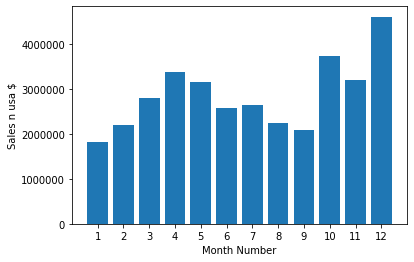

In [32]:
import matplotlib.pyplot as plt

# range want to get month between 1 to 13
Months = range(1, 13)

plt.bar(Months, results['Sales'])
plt.xticks(Months)
plt.ylabel('Sales n usa $')
plt.xlabel('Month Number')
plt.show()

#### The highest sale was in December. The main reason would be that during Christmas holiday there is plenty of discounts. Hence why customers buy more at this month than other months. Addionally, January sales is the lowest. The reason for this is that after spending a lot during Christmas period, customers don't have much to spend. 

### Question 2:  Which city had the higehst sales and why?

###### add a city column

In [36]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City']= df['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)+ ')')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [37]:
result= df.groupby('City').sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


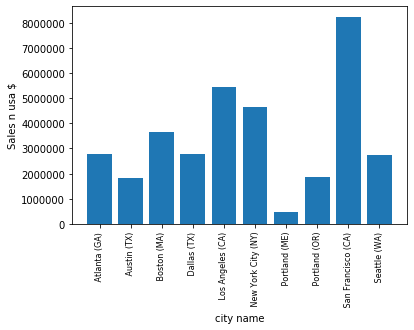

In [38]:
cities = [city for city, df in df1.groupby('City')]

plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation='vertical', size= 8)
plt.ylabel('Sales n usa $')
plt.xlabel('city name')
plt.show()

####  Maybe companies and people in San Fransico  need more electronics because of the silicon valley's presence.  While in Portland, maybe advetising is bad there.

### Question 3: what time should we display our aadvertisements to maximise likelyhood of customers buying products?

In [39]:
df['Order Date']= pd.to_datetime(df['Order Date'])

In [40]:
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


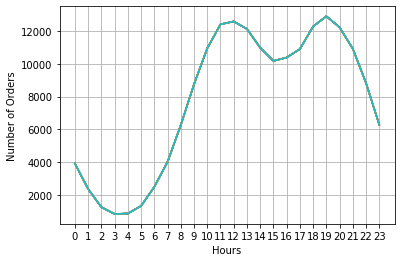

In [41]:
# there are 24 hours better to make it continoues graph, line chart
hours = [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Peak is at 12 PM and 7 PM. It is better to advertise just before one hour before the peak hours to maximise sales. 

### Question 4: Which products were most often sold together?

In [42]:
df1=df[df['Order ID'].duplicated(keep=False)]

df1['Grouped']= df1.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\family\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
df1= df1[['Order ID', 'Grouped']].drop_duplicates()
df1.head(3)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [48]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df1['Grouped']:
    row_list =row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Above data shows that iPhone and Lightning Charging Cable were most bought together. Managers can get more strategic her to maximise sales. 

###  Question 5: what products sold the most and why?

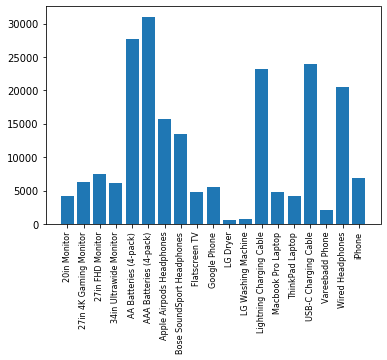

In [49]:
prod=df.groupby('Product')
quan=prod.sum()['Quantity Ordered']

produ=[product for product, df in prod]
plt.bar(produ, quan)
plt.xticks(produ, rotation='vertical', size=8)
plt.show()

####  Frequently bought products are cheap compare to monitor, for instance, AAA Batteries (4-pack).  Below graph shows additional line graph with bar chart on price against Quantity orderered.

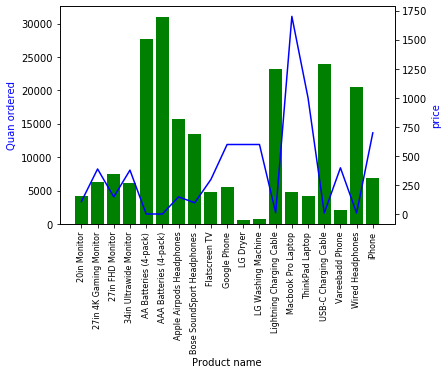

In [50]:
prices= df.groupby('Product').mean()['Price Each']
fi, ax1 =plt.subplots()
ax2 =ax1.twinx()
ax1.bar(produ, quan, color='g')
ax2.plot(produ, prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quan ordered', color='b')
ax2.set_ylabel('price', color='b')
ax1.set_xticklabels(produ, rotation='vertical', size=8)

plt.show()

#### The bar chart shows that laptops are bought more frequently despite the fact the price is high compare to dryers and washing machines. Reason for this could be that laptops are needed by more students and workers.